In [1]:
pip install rasterio matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_path = r"D:\SEMESTER VI\SATELLITE IMAGING\OOTY"
scene_id = "LC09_L1TP_144052_20251202_20251202_02_T1"

In [4]:
bands = {}

for i in range(1, 12):
    band_file = f"{scene_id}_B{i}.TIF"
    with rasterio.open(os.path.join(data_path, band_file)) as src:
        bands[f"B{i}"] = src.read(1)

In [5]:
qa_file = f"{scene_id}_QA_PIXEL.TIF"

with rasterio.open(os.path.join(data_path, qa_file)) as qa_src:
    qa = qa_src.read(1)

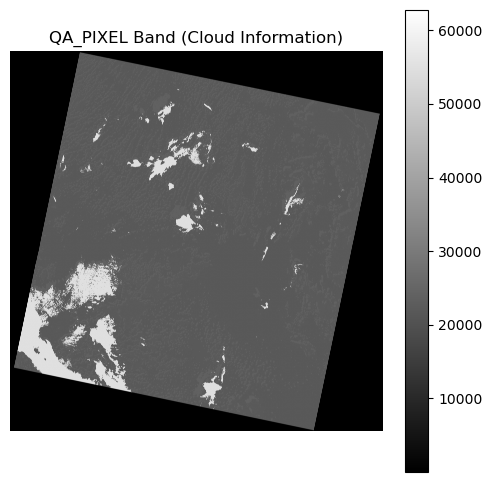

In [6]:
plt.figure(figsize=(6,6))
plt.imshow(qa, cmap='gray')
plt.title("QA_PIXEL Band (Cloud Information)")
plt.colorbar()
plt.axis("off")
plt.show()

In [7]:
cloud_bit = 1 << 3
cloud_mask = (qa & cloud_bit) == 0

In [8]:
# Apply cloud mask to each RGB band
red_cm = np.where(cloud_mask, bands["B4"], np.nan)
green_cm = np.where(cloud_mask, bands["B3"], np.nan)
blue_cm = np.where(cloud_mask, bands["B2"], np.nan)

# Stack masked bands
rgb_cloud_masked = np.dstack((red_cm, green_cm, blue_cm))

# Normalize
rgb_cloud_masked = (rgb_cloud_masked - np.nanmin(rgb_cloud_masked)) / \
                    (np.nanmax(rgb_cloud_masked) - np.nanmin(rgb_cloud_masked))

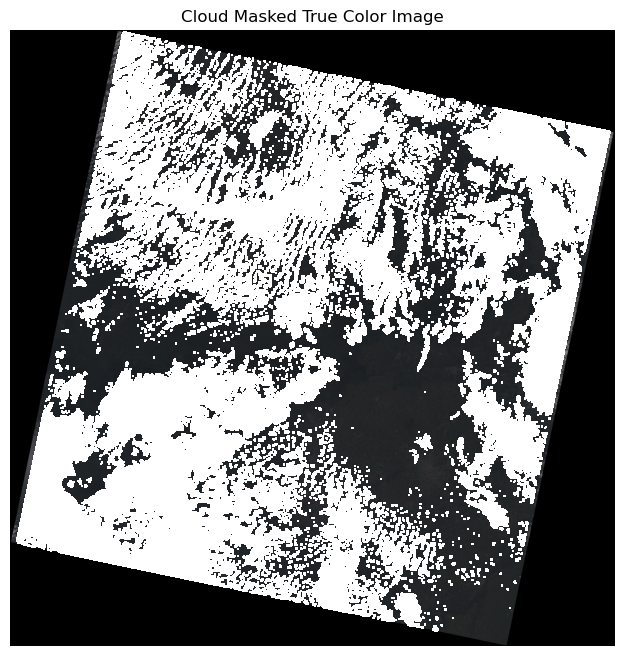

In [9]:
plt.figure(figsize=(8,8))
plt.imshow(rgb_cloud_masked)
plt.title("Cloud Masked True Color Image")
plt.axis("off")
plt.show()

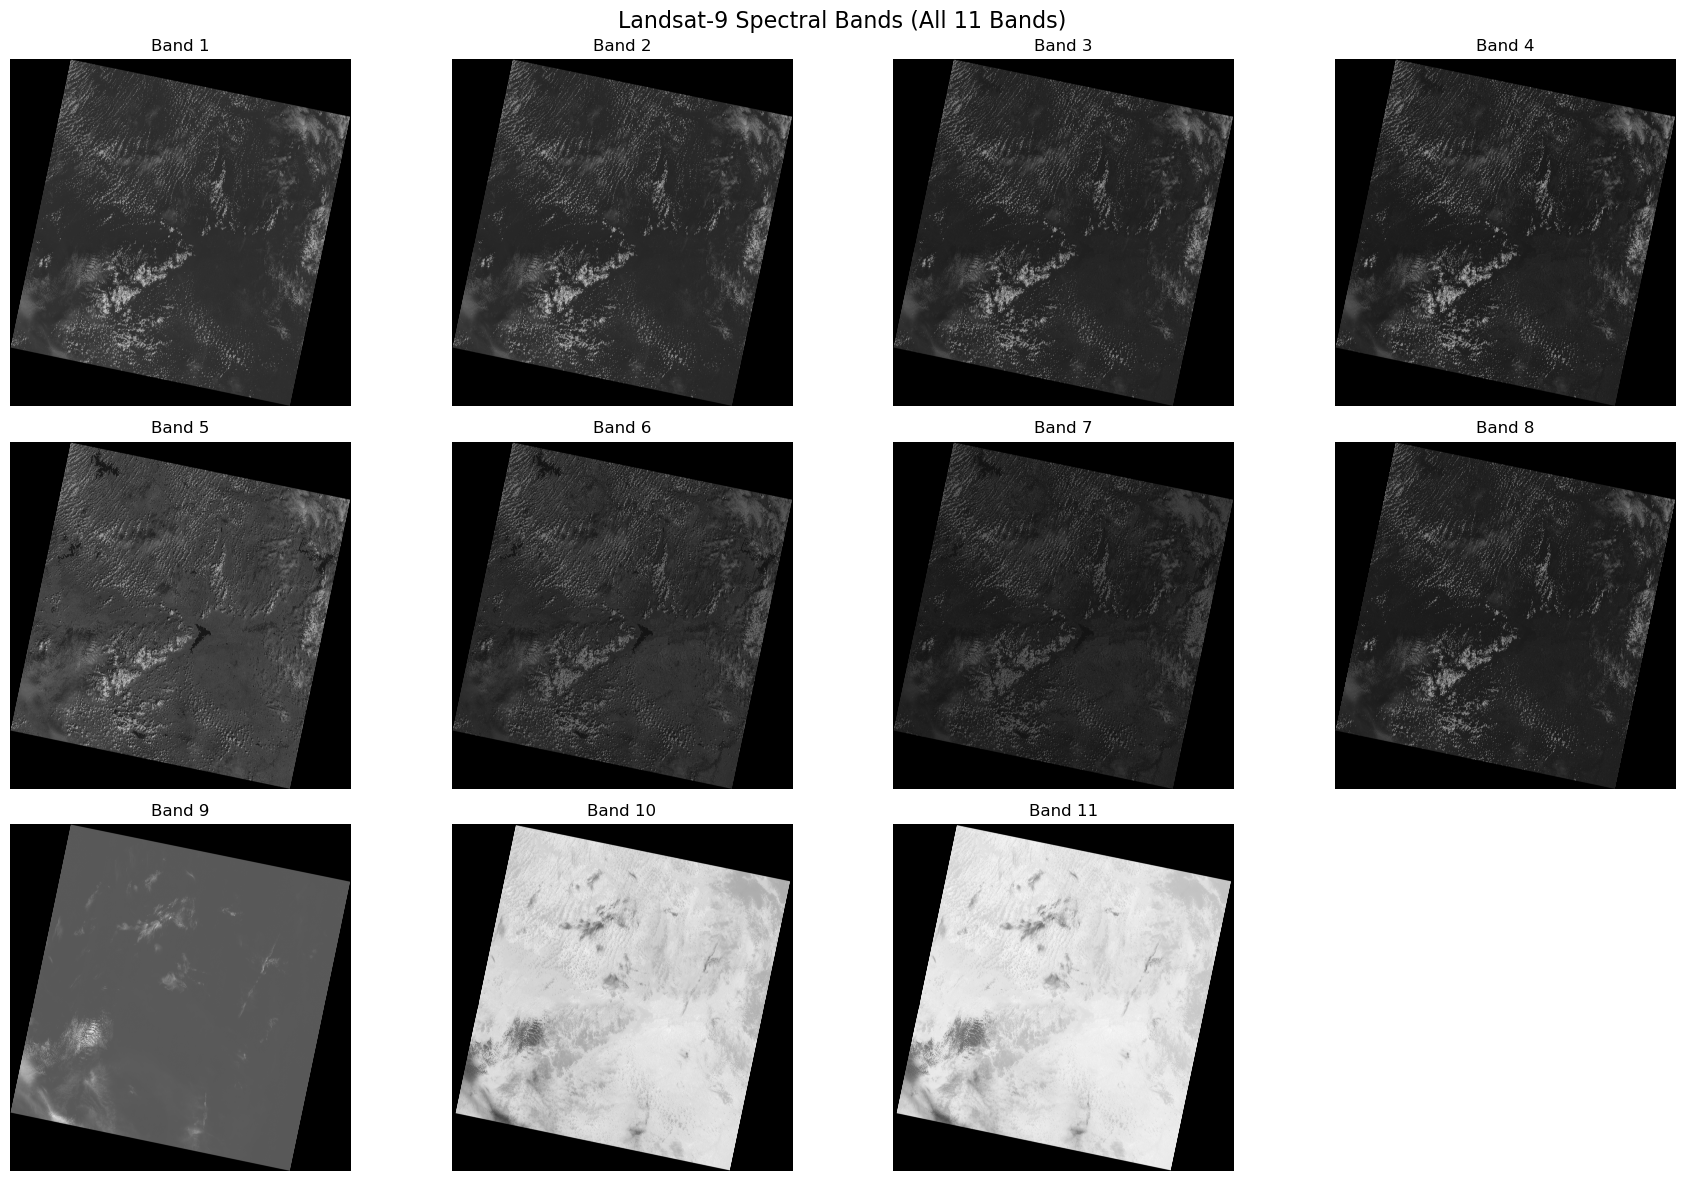

In [10]:
plt.figure(figsize=(18,12))

for i in range(1, 12):
    plt.subplot(3, 4, i)
    plt.imshow(bands[f"B{i}"], cmap='gray')
    plt.title(f"Band {i}")
    plt.axis("off")

plt.suptitle("Landsat-9 Spectral Bands (All 11 Bands)", fontsize=16)
plt.tight_layout()
plt.show()

In [5]:
np.max(bands["B1"])

np.uint16(52512)

In [6]:
Qcalmax = [
    65535,  # Band 1
    65535,  # Band 2
    65535,  # Band 3
    65535,  # Band 4
    65535,  # Band 5
    65535,  # Band 6
    65535,  # Band 7
    65535,  # Band 8
    65535,  # Band 9
    65535,  # Band 10
    65535   # Band 11
]
Qcalmin = [
    1,  # Band 1
    1,  # Band 2
    1,  # Band 3
    1,  # Band 4
    1,  # Band 5
    1,  # Band 6
    1,  # Band 7
    1,  # Band 8
    1,  # Band 9
    1,  # Band 10
    1   # Band 11
]
Lmin = [
    -64.35912,   # Band 1
    -66.10202,   # Band 2
    -60.98277,   # Band 3
    -51.37775,   # Band 4
    -31.48952,   # Band 5
    -7.82728,    # Band 6
    -2.63759,    # Band 7
    -57.98234,   # Band 8
    -12.30785,   # Band 9
    0.10038,     # Band 10
    0.10035     # Band 11
]
Lmax = [
    779.35175,   # Band 1
    800.45728,   # Band 2
    738.46606,   # Band 3
    622.15485,   # Band 4
    381.31995,   # Band 5
    94.78384,    # Band 6
    31.93968,    # Band 7
    702.13263,   # Band 8
    149.04099,   # Band 9
    25.00330,    # Band 10
    22.97172    # Band 11
]

In [7]:
i=0
for i in range(0, 11):
    G = (Lmax[i]-Lmin[i])/(Qcalmax[i]-Qcalmin[i])
    B = Lmin[i] - ((Lmax[i]-Lmin[i])/(Qcalmax[i]-Qcalmin[i]))*Qcalmin[i]

In [ ]:
plt.figure(figsize=(18,12))
for i in range(11):
    G = (Lmax[i] - Lmin[i]) / (Qcalmax[i] - Qcalmin[i])
    B = Lmin[i] - G * Qcalmin[i]

    DN = bands[f"B{i+1}"]
    L = G * DN + B
    L[L < 0] = 0

    plt.subplot(3, 4, i + 1)
    plt.imshow(L)
    plt.title(f"Radiance – Band B{i+1}", fontsize=12)
    plt.axis("off")

plt.suptitle("Landsat-9 At-Sensor Spectral Radiance (All 11 Bands)", fontsize=16, y=0.98)
plt.tight_layout()
plt.show()


In [6]:
red = bands["B4"]
green = bands["B3"]
blue = bands["B2"]

rgb = np.dstack((red, green, blue))

rgb = (rgb - np.min(rgb)) / (np.max(rgb) - np.min(rgb))

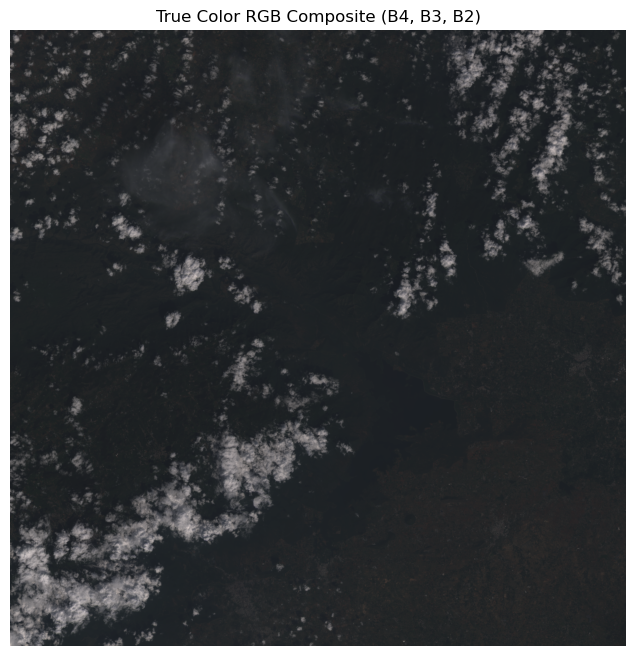

In [7]:
plt.figure(figsize=(8,8))
plt.imshow(rgb[3000:5001, 3000:5001])
plt.title("True Color RGB Composite (B4, B3, B2)")
plt.axis("off")
plt.show()

In [18]:
nir = bands["B5"]
red = bands["B4"]
green = bands["B3"]

fcc = np.dstack((nir, red, green))

# Normalize
fcc = (fcc - np.min(fcc)) / (np.max(fcc) - np.min(fcc))

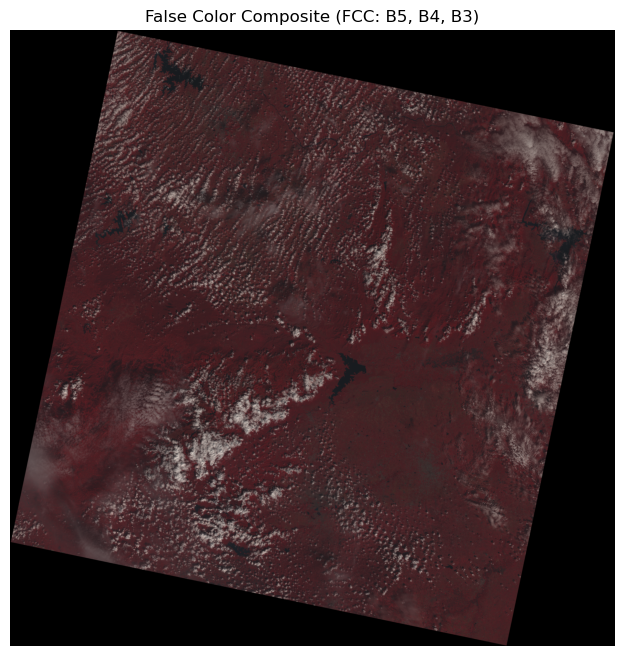

In [19]:
plt.figure(figsize=(8,8))
plt.imshow(fcc)
plt.title("False Color Composite (FCC: B5, B4, B3)")
plt.axis("off")
plt.show()

In [20]:
nir_cm = np.where(cloud_mask, bands["B5"], np.nan)
red_cm = np.where(cloud_mask, bands["B4"], np.nan)
green_cm = np.where(cloud_mask, bands["B3"], np.nan)

fcc_cm = np.dstack((nir_cm, red_cm, green_cm))

fcc_cm = (fcc_cm - np.nanmin(fcc_cm)) / \
         (np.nanmax(fcc_cm) - np.nanmin(fcc_cm))

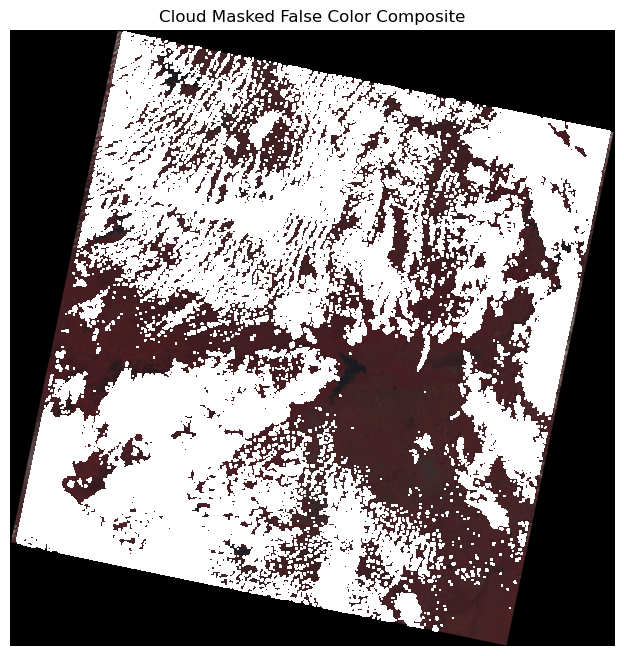

In [21]:
plt.figure(figsize=(8,8))
plt.imshow(fcc_cm)
plt.title("Cloud Masked False Color Composite")
plt.axis("off")
plt.show()

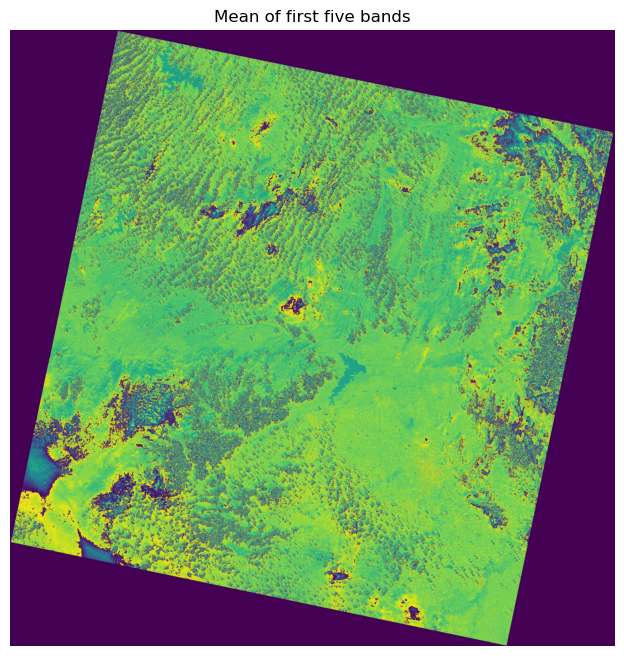

In [9]:
j=0
sum_of_bands=0
for j in range(0, 5):
    sum_of_bands += bands[f"B{j+1}"]
avg = sum_of_bands/5
plt.figure(figsize=(8,8))
plt.imshow(avg)
plt.title("Mean of first five bands")
plt.axis("off")
plt.show()

In [8]:
for key in bands:
    bands[key] = bands[key].astype(float)   
    bands[key][bands[key] == 0] = np.nan

In [9]:
stats = {}

for k in range(0, 11):
    band = bands[f"B{k+1}"][3000:5001, 3000:5001]

    stats[f"B{k+1}"] = {
        "Mean": np.mean(band),
        "Median": np.median(band),
        "Standard_Deviation": np.std(band),
        "Minimum": np.min(band),
        "Maximum": np.max(band)
    }
for band, values in stats.items():
    print(f"\n{band}")
    for key, val in values.items():
        print(f"  {key}: {val:.4f}")


B1
  Mean: 11322.9274
  Median: 9727.0000
  Standard_Deviation: 4487.5934
  Minimum: 8104.0000
  Maximum: 47173.0000

B2
  Mean: 10578.8672
  Median: 8890.0000
  Standard_Deviation: 4792.5544
  Minimum: 7227.0000
  Maximum: 49553.0000

B3
  Mean: 10040.9127
  Median: 8420.0000
  Standard_Deviation: 4831.7745
  Minimum: 6404.0000
  Maximum: 49990.0000

B4
  Mean: 9460.6572
  Median: 7650.0000
  Standard_Deviation: 5231.0638
  Minimum: 5497.0000
  Maximum: 52832.0000

B5
  Mean: 16582.9121
  Median: 15924.0000
  Standard_Deviation: 5115.1908
  Minimum: 5378.0000
  Maximum: 58320.0000

B6
  Mean: 12657.2481
  Median: 11801.0000
  Standard_Deviation: 4404.8577
  Minimum: 4907.0000
  Maximum: 50143.0000

B7
  Mean: 9481.8230
  Median: 8407.0000
  Standard_Deviation: 3668.0784
  Minimum: 4960.0000
  Maximum: 49113.0000

B8
  Mean: 12236.6694
  Median: 9499.0000
  Standard_Deviation: 5824.9172
  Minimum: 6708.0000
  Maximum: 43607.0000

B9
  Mean: 5120.9711
  Median: 5067.0000
  Standard_Dev

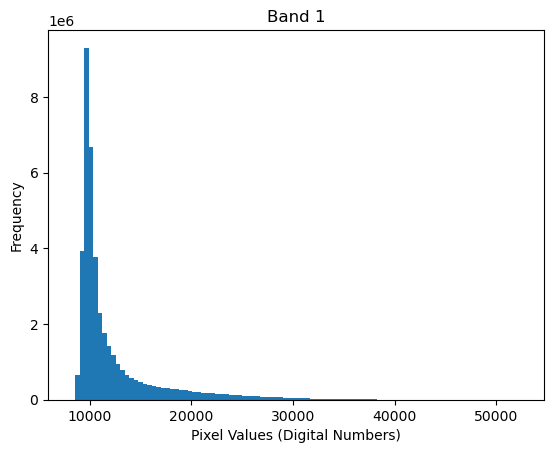

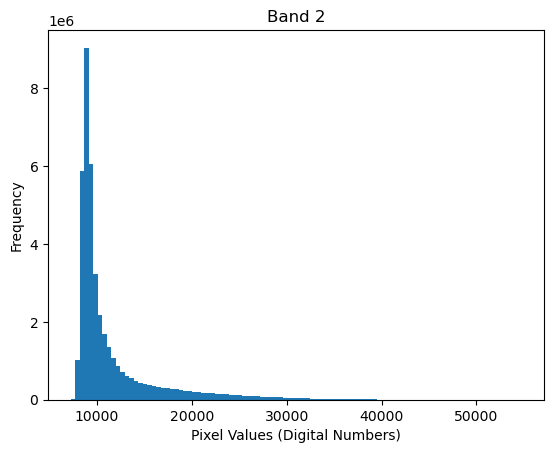

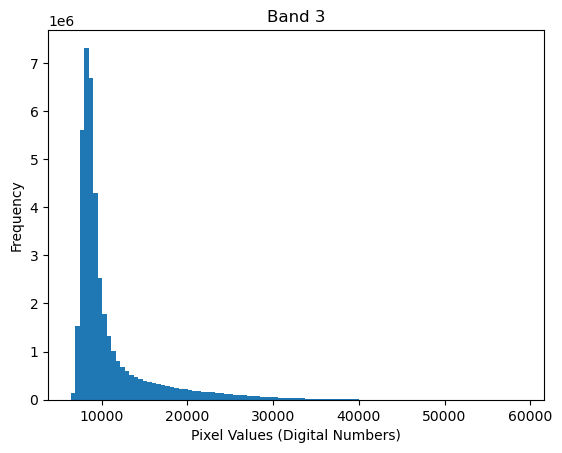

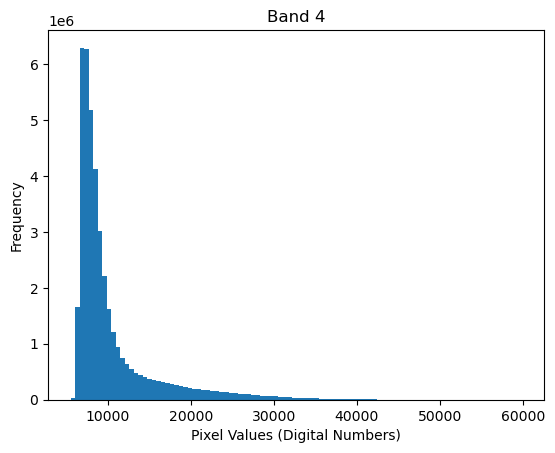

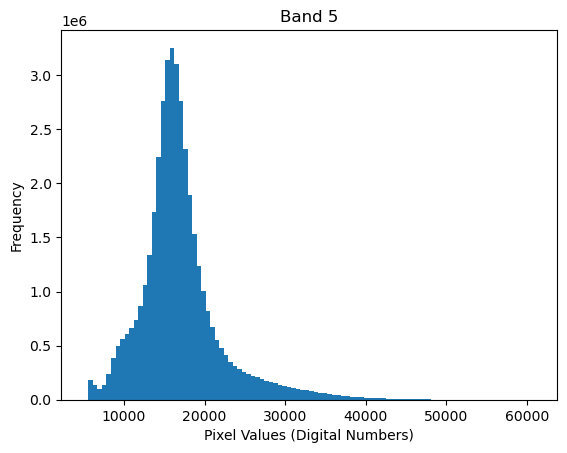

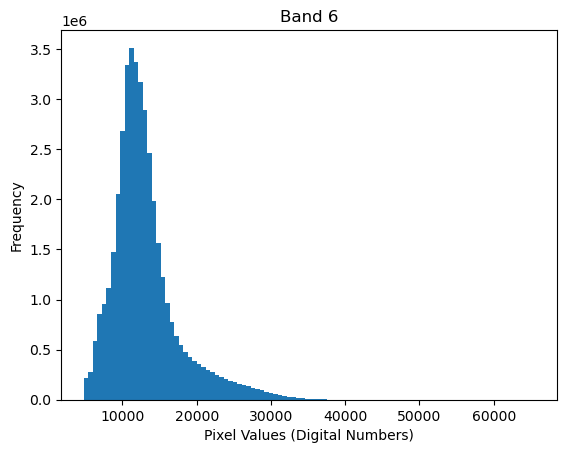

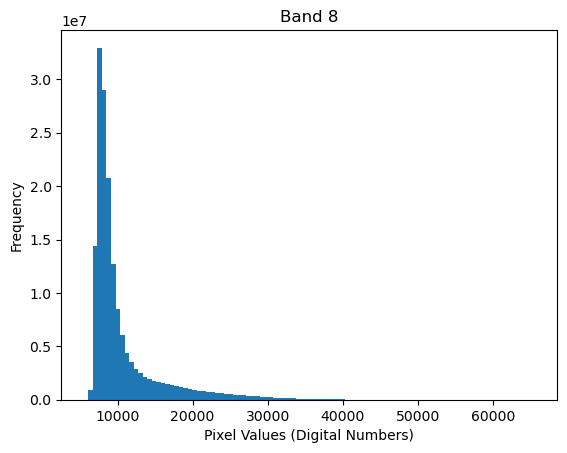

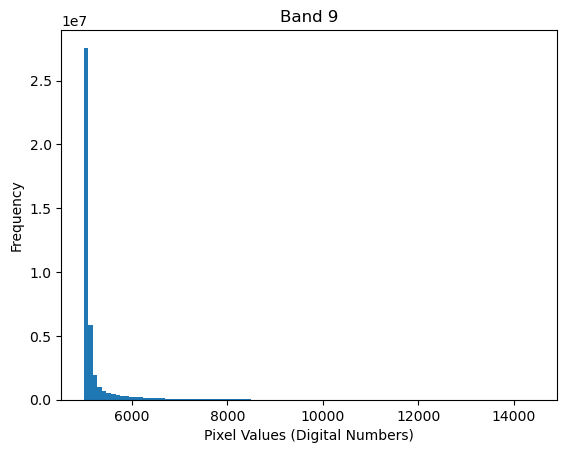

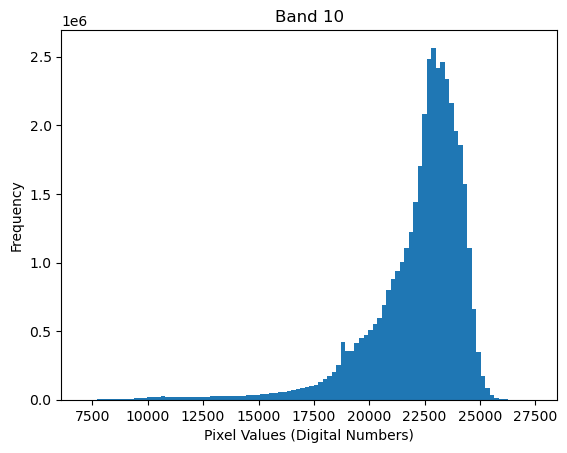

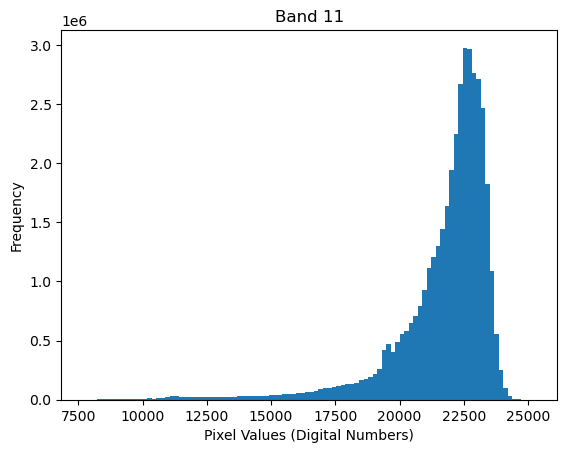

In [10]:
import matplotlib.pyplot as np
k = 0
for k in range(0, 11):
    plt.hist(bands[f"B{k+1}"].flatten(),bins=100)
    plt.xlabel('Pixel Values (Digital Numbers)')
    plt.ylabel('Frequency')
    plt.title(f"Band {k+1}")
    plt.show()

ValueError: x and y must be the same size

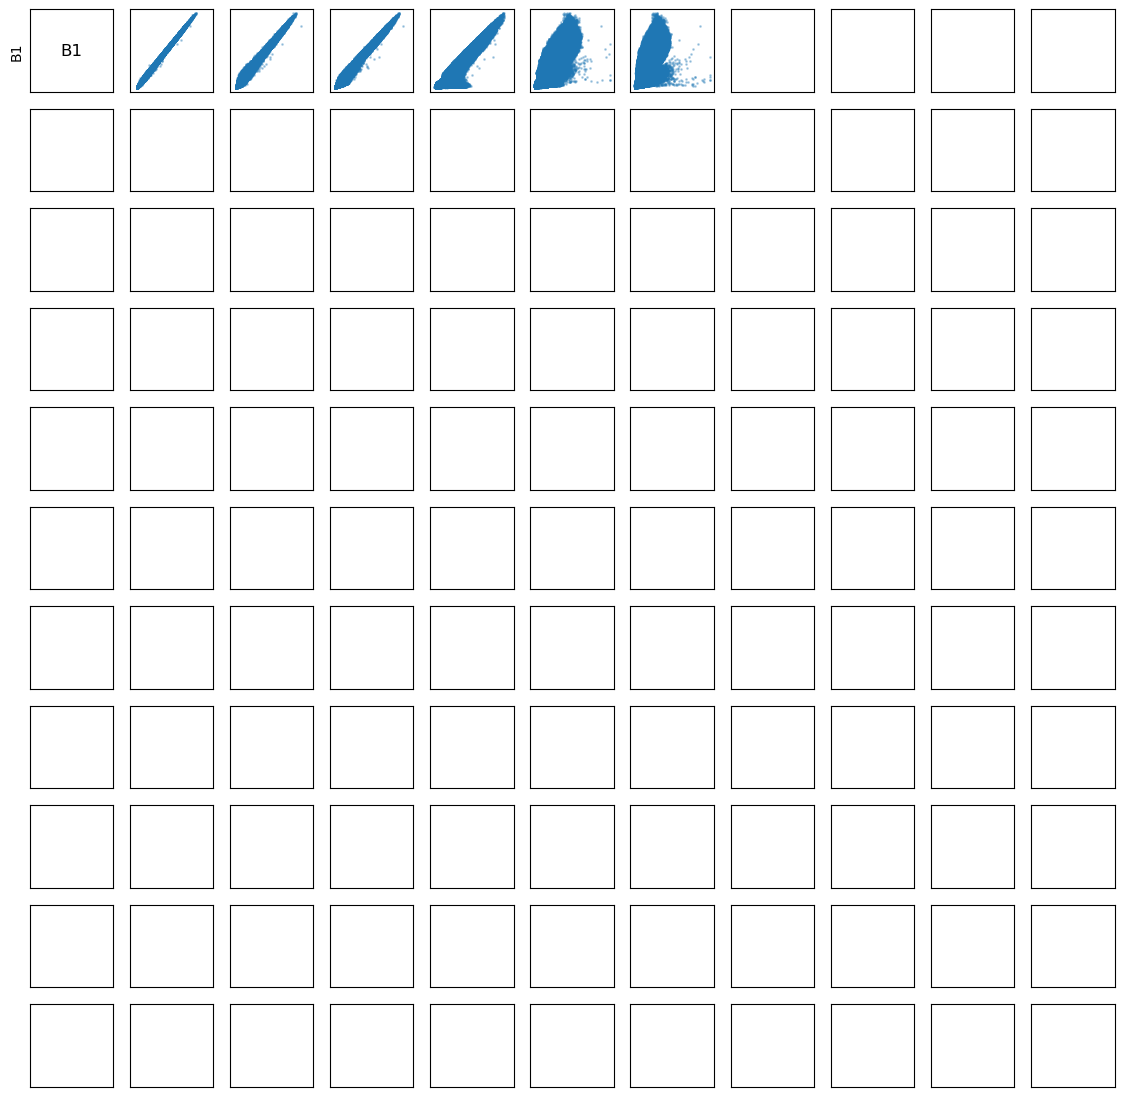

In [11]:
import numpy as np
import matplotlib.pyplot as plt

band_names = ["B1","B2","B3","B4","B5","B6","B7","B8","B9","B10","B11"]

data = {b: bands[b].ravel() for b in band_names}

n = len(band_names)

fig, axes = plt.subplots(n, n, figsize=(14, 14), sharex=True, sharey=True)

for i, bi in enumerate(band_names):
    for j, bj in enumerate(band_names):
        ax = axes[i, j]

        if i == j:
            ax.text(0.5, 0.5, bi,
                    ha="center", va="center",
                    fontsize=12, transform=ax.transAxes)
            ax.set_xticks([])
            ax.set_yticks([])

        else:
            ax.scatter(data[bj], data[bi], s=1, alpha=0.3)
        if i == n - 1:
            ax.set_xlabel(bj)   
        if j == 0:
            ax.set_ylabel(bi)   

plt.suptitle("Pairwise Scatter Plots of Spectral Bands", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
band_vectors = []

for i in range(1, 12):
    region = bands[f"B{i}"][3000:5001, 3000:5001]
    band_vectors.append(region.flatten())

labels = [f"B{i}" for i in range(1, 12)]
cov_matrix = np.cov(band_vectors)
corr_matrix = np.corrcoef(band_vectors)

cov_df = pd.DataFrame(cov_matrix, index=labels, columns=labels)
corr_df = pd.DataFrame(corr_matrix, index=labels, columns=labels)

print("Covariance Matrix:\n")
print(cov_df)

print("\nCorrelation Matrix:\n")
print(corr_df)